## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

## Import Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize

## Load the Dataset

In [12]:
folder_path = './Dataset Clean PET Images'  
image_size = (200, 200)  

images = []
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)

images = np.array(images)
images = np.array([resize(image, (128, 128)) for image in images])
images = images.astype('float32') / 255.0
grayscale_images = np.mean(images, axis=-1, keepdims=True)
x_train, x_test = train_test_split(grayscale_images, test_size=0.2, random_state=42)

## Add Noise to the Image

In [13]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [14]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Exploratory Data Analysis

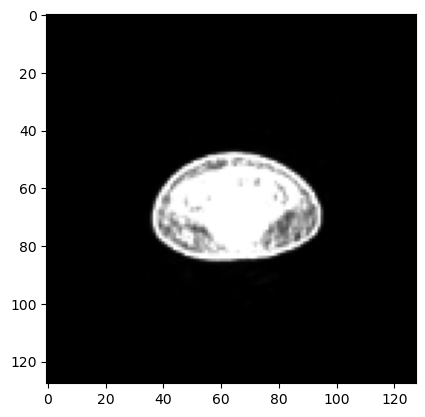

In [15]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(128,128))
plt.gray()

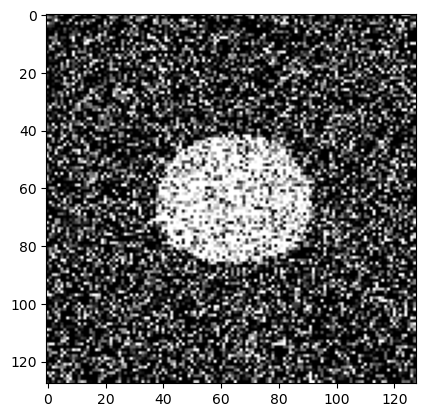

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(128,128))
plt.gray()

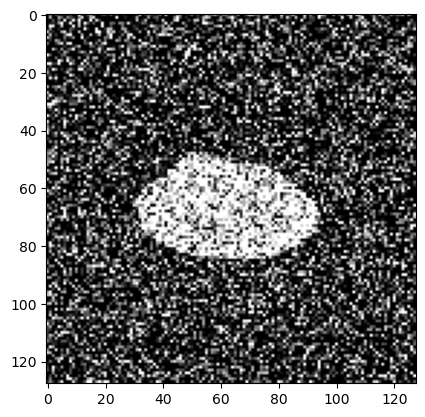

In [17]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(128,128))
plt.gray()

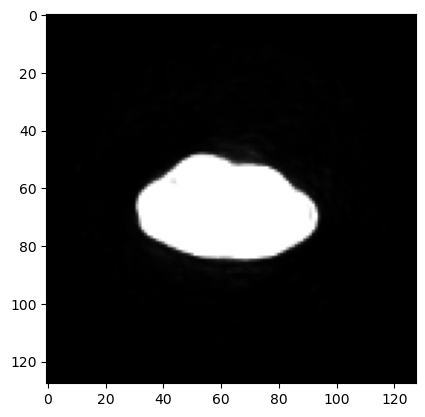

In [18]:
plt.imshow(x_test[index].reshape(128,128))
plt.gray()

## Model Creation

In [19]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(128, 128, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

2023-09-14 23:07:45.967952: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-14 23:07:45.968145: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-14 23:07:45.968154: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-14 23:07:45.968504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-14 23:07:45.968520: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 64, 64, 16)        0

In [20]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20


2023-09-14 23:07:59.099126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 0.1599

2023-09-14 23:10:06.904198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 141s 979ms/step - loss: 0.1599 - val_loss: 0.0637
Epoch 2/20
143/143 [==============================] - 139s 971ms/step - loss: 0.0613 - val_loss: 0.0593
Epoch 3/20
143/143 [==============================] - 138s 962ms/step - loss: 0.0592 - val_loss: 0.0580
Epoch 4/20
143/143 [==============================] - 139s 969ms/step - loss: 0.0585 - val_loss: 0.0577
Epoch 5/20
143/143 [==============================] - 147s 1s/step - loss: 0.0581 - val_loss: 0.0574
Epoch 6/20
143/143 [==============================] - 142s 992ms/step - loss: 0.0578 - val_loss: 0.0570
Epoch 7/20
143/143 [==============================] - 142s 993ms/step - loss: 0.0576 - val_loss: 0.0568
Epoch 8/20
143/143 [==============================] - 142s 996ms/step - loss: 0.0575 - val_loss: 0.0566
Epoch 9/20
143/143 [==============================] - 140s 981ms/step - loss: 0.0573 - val_loss: 0.0565
Epoch 10/20
143/143 [==============================] - 140s 978ms/step - loss:

## Visualize the Results

In [21]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

  2/286 [..............................] - ETA: 14s

2023-09-14 23:55:47.089048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 13s 47ms/step


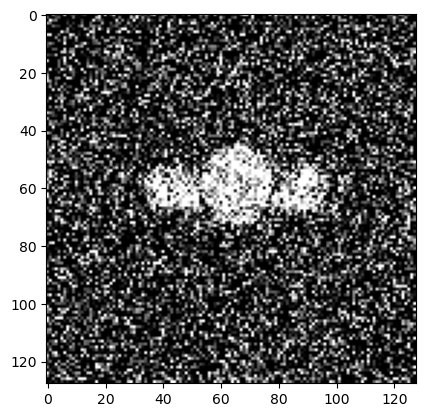

In [22]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(128,128))
plt.gray()

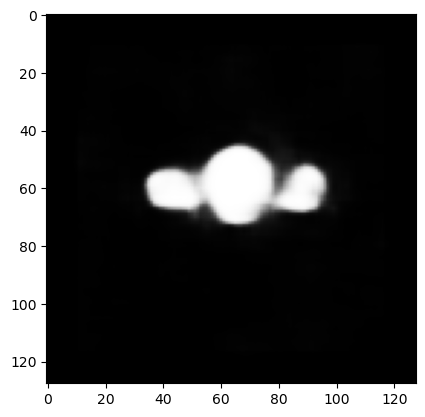

In [23]:
# visualize compressed image
plt.imshow(pred[index].reshape(128,128))
plt.gray()

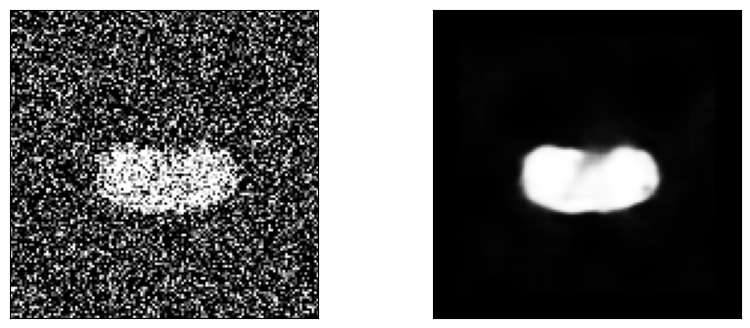

In [24]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

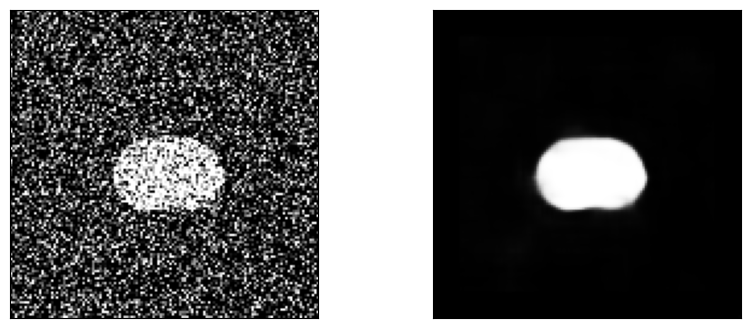

In [25]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
model.save('autoencoder_denoise_model.keras')

## Running On Test Data

In [1]:
from keras.models import load_model

# Load the model
model = load_model('autoencoder_denoise_model.h5')

2023-10-02 11:30:34.226279: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-02 11:30:34.226296: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-02 11:30:34.226302: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-02 11:30:34.226359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-02 11:30:34.226388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [59]:
testing_image = "./PT resize128.png"
image_size = (128, 128)

img = load_img(testing_image, target_size=image_size)
img_array = img_to_array(img)
img_array_test = img_array.astype('float32') / 255.0
grayscale_images = np.mean(img_array_test, axis=-1, keepdims=True)
img_array_test = grayscale_images.reshape(1, 128, 128, 1)

In [60]:
pred = model.predict(img_array_test)

1/1 [==============================] - 0s 79ms/step


In [61]:
img_array.shape

(128, 128, 3)

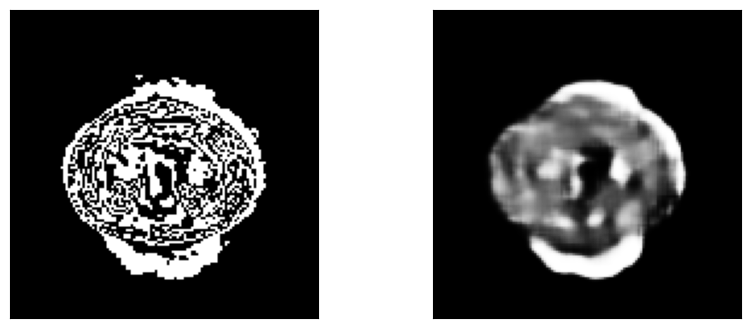

In [62]:
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(img_array_test.reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred.reshape(128,128))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
from PIL import Image
import numpy as np

# Assuming pred is already defined and is a 2D array with shape (128, 128)
image_data = pred.reshape(128, 128)

# Convert the data to an 8-bit format (0-255)
image_data = (image_data * 255).astype(np.uint8)

# Create an image from the array data
img = Image.fromarray(image_data, 'L')  # 'L' indicates grayscale mode

# Save the image to a file
img.save('pred_image.jpg')


In [10]:
from PIL import Image, ImageEnhance

def increase_contrast(image_path, output_path, factor):
    # Open the image
    img = Image.open(image_path)
    
    # Enhance the contrast
    enhancer = ImageEnhance.Contrast(img)
    img_enhanced = enhancer.enhance(factor)
    
    # Save the enhanced image
    img_enhanced.save(output_path)
    print("Done!")

image_path = './PT150.jpg'
output_path = './PT150 g2b.jpg'
factor = 2.0  # Adjust the factor, > 1 increases contrast, < 1 decreases it.
increase_contrast(image_path, output_path, factor)



Done!


In [22]:
from keras.preprocessing.image import save_img


# Reverse the normalization
img_array_test = (img_array_test * 255).astype('uint8')

# Reshape from (1, 128, 128, 1) to (128, 128, 1) for grayscale
img_array_reshaped = img_array_test[0]

# Save the image using Keras's save_img
output_image_path = "./pred_image.jpg"
save_img(output_image_path, img_array_reshaped)



In [36]:
from PIL import Image, ImageOps

def invert_image(image_path, output_path):
    # Open the image
    img = Image.open(image_path)

    # Invert the colors using ImageOps
    inverted_img = ImageOps.invert(img)

    # Save the inverted image
    inverted_img.save(output_path)
    print(f"Image saved to {output_path}")

# Sample usage
image_path = './PT reampled150.png'
output_path = './PT reampled150_invert.jpg'
invert_image(image_path, output_path)


Image saved to ./PT reampled150_invert.jpg
